In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_pickle('../data/interim/processed_data.pkl')
df.head()


,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [12]:
# Dropping the Time stamps

df.reset_index(drop=True, inplace=True)
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [19]:
#Features

features = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'set']

X = df[features]
X.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,set
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,64
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,64
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,64
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,64
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,64


In [20]:
# Label

label = ['label', 'participant', 'category']
Y = df[label]
Y.head()

,label,participant,category
0,bench,B,heavy
1,bench,B,heavy
2,bench,B,heavy
3,bench,B,heavy
4,bench,B,heavy


In [23]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Test the accuracy of the model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5937846836847946


/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


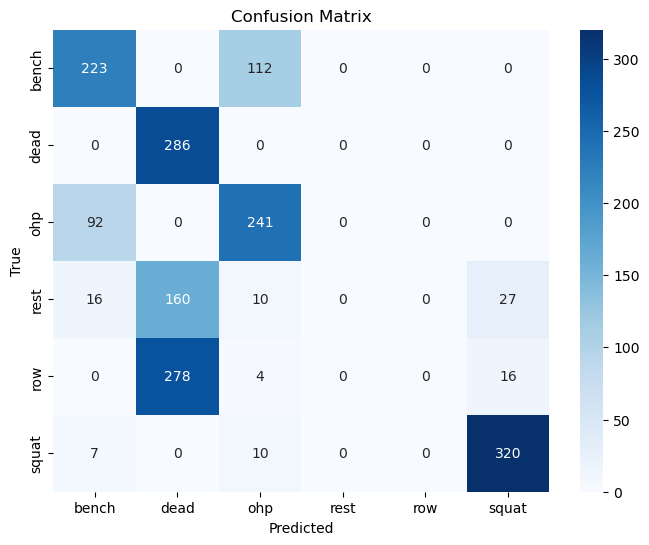

<Figure size 640x480 with 0 Axes>

In [36]:


cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('../reports/figures/naive_cm.png')


In [37]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(Y_train)

trained_data = pd.concat([X_train_df, y_train_df], axis=1)

trained_data.to_csv('../data/interim/trained_data.csv')
